In [29]:
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [35]:
data = pd.read_csv("bank-additional-full.csv",sep=";")

In [36]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [40]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [41]:
# Check data types
data_types = data.dtypes
print("Data Types:\n", data_types)

Data Types:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [42]:
# Basic statistics
statistics = data.describe(include='all')  # include='all' to get stats for categorical columns as well
print("Basic Statistics:\n", statistics)

Basic Statistics:
                 age     job  marital          education default housing  \
count   41188.00000   41188    41188              41188   41188   41188   
unique          NaN      12        4                  8       3       3   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10422    24928              12168   32588   21576   
mean       40.02406     NaN      NaN                NaN     NaN     NaN   
std        10.42125     NaN      NaN                NaN     NaN     NaN   
min        17.00000     NaN      NaN                NaN     NaN     NaN   
25%        32.00000     NaN      NaN                NaN     NaN     NaN   
50%        38.00000     NaN      NaN                NaN     NaN     NaN   
75%        47.00000     NaN      NaN                NaN     NaN     NaN   
max        98.00000     NaN      NaN                NaN     NaN     NaN   

         loan   contact  month day_of_week  ...      campaign         pdays  \
c

In [43]:
# Fill missing values for categorical columns with mode
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Alternatively, if you want to drop rows with missing values
# data.dropna(inplace=True)

In [44]:
# Convert categorical variables into numerical format using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)  # drop_first=True to avoid dummy variable trap

# Check the first few rows of the encoded dataset
print(data_encoded.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_nov  month_oct  \
0          -36.4      4.857       5191.0  ...          0          0   
1          -36.4      4.857       5191.0  ...          0          0   
2          -36.4      4.857       5191.0  ...          0          0   
3          -36.4      4.857       5191.0  ...          0          0   
4          -36.4      4.857       5191.0  ...          0          0   

   month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0                1              

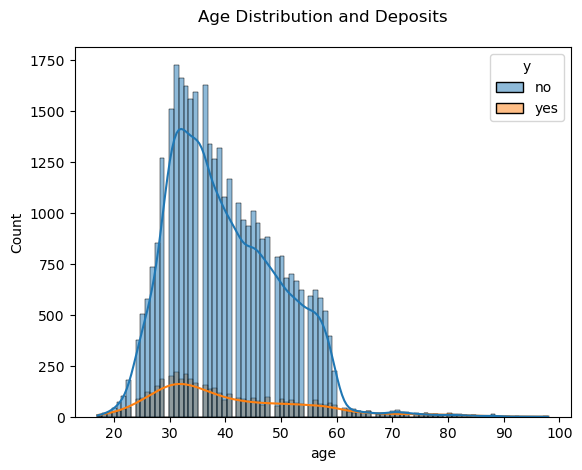

In [46]:
sns.histplot(x="age", data=data, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
X = data_encoded.drop('y_yes', axis=1)  # Features (dropping the target column which is the encoded purchase column)
y = data_encoded['y_yes']  # Target variable (whether the customer will make a purchase)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [70]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [71]:
y_pred = clf.predict(X_test)

Accuracy: 0.9150279193979121
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.66      0.50      0.57      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.73      0.76     12357
weighted avg       0.91      0.92      0.91     12357



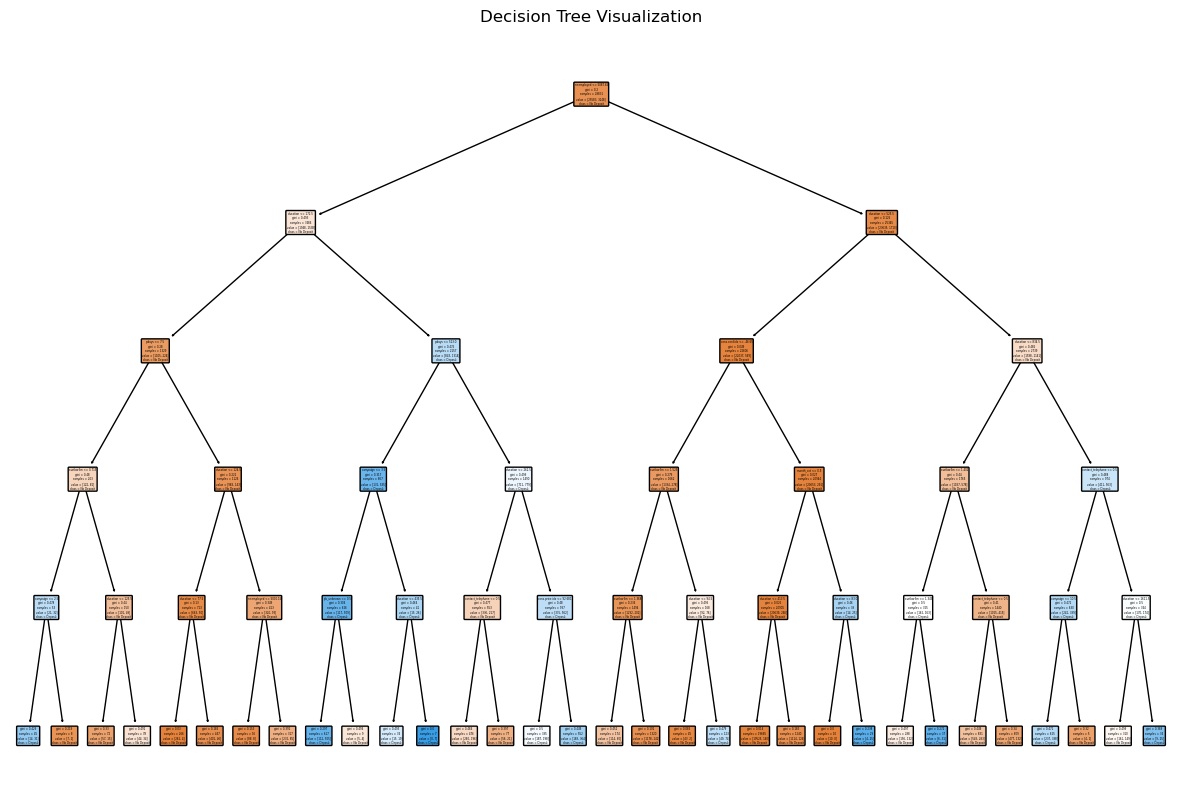

=== Data Summary ===
Shape of the dataset: (41188, 21)

Missing Values Summary:
Series([], dtype: int64)

Data Types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Basic Statistics:
                age     job  marital          education default housing  \
count   41188.00000   41188    41188              41188   41188   41188   
unique          NaN      12        4                  8       3       3   
top             NaN  admin.  married  university.degree      no     yes   
fre

In [81]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print accuracy and classification report
print("Accuracy:", accuracy)
print(classification_rep)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, filled=True, rounded=True, class_names=["No Deposit", "Deposit"])
plt.title("Decision Tree Visualization")
plt.show()

# Check for missing values again
missing_values = data.isnull().sum()
missing_summary = missing_values[missing_values > 0]

# Define the summary function
def print_summary(missing_summary, data_types, statistics, accuracy, classification_rep):
    print("=== Data Summary ===")
    print(f"Shape of the dataset: {data.shape}")
    print("\nMissing Values Summary:")
    print(missing_summary)
    print("\nData Types:")
    print(data_types)
    print("\nBasic Statistics:")
    print(statistics)
    
    print("\n=== Model Evaluation ===")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_rep)

# Call the summary function with necessary parameters
print_summary(missing_summary, data_types, statistics, accuracy, classification_rep)
